# Verbs Visualisation

# Fig1_VerbMP.png
## For each __verb__: one diagram comparing the __looking time at target before and after__, as one bar each. These looking times need to be __averaged__ (mean) over all individuals. So two bars per diagram. As many diagrams as there are verbs.

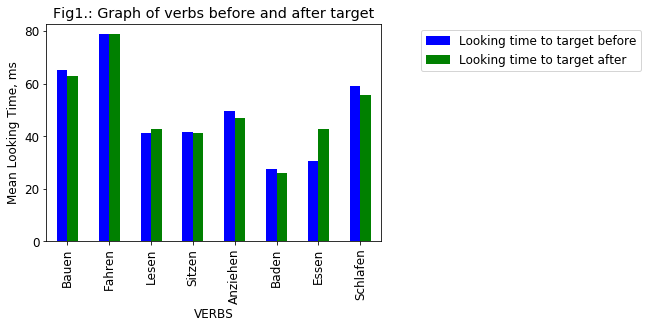

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
################################################################################
# Copyright© 2018. SVAKSHA { https://github.com/svaksha }
# License: AGPLv3+ <http://www.gnu.org/licenses/agpl.html>
# Include the Copyright notice and this permission notice in all copies.
################################################################################
#
# USAGE: check if XLS files exist on your machine, then run each jupyter cell sequentially.
#-------------------------------------------------------------------------------
import numpy as np   # numpy for matrix ops
import pandas as pd     # pandas for XLS reading.
import matplotlib.pyplot as mpl
from matplotlib.pyplot import *
import pylab as pl
import dask 
import seaborn as sea
#
#-------------------------------------------------------------
pathy = '../data_output/results_simple_target_distractor.xlsx'
# creating pandas.io.excel.ExcelFile object in a DF
xls = pd.ExcelFile(pathy)
## it has sheet_names attribute
wb = xls.sheet_names
## loop through all the workbook sheets
for sh in wb: 
    matrix = xls.parse(sh)
# more elegant to generate a dictionary of DataFrame matrices that can be parsed separately.
matr = {sh:xls.parse(sh) for sh in xls.sheet_names} 
sheetnames = matr.keys() # gets sheet names
# Load the matrix for the sheet-2 'Results_perc'
matrx1 = matr['Results_perc']
matr2col = matrx1.iloc[0:49]   # slice thought the matrix for each verb 
#----------
# Comparing the percentage of looking time at target before and after, for each verb, averaged (mean) over all VPs.
#----------
dfverbpct = (matr2col.filter(["BAUEN PERC BEF", "BAUEN PERC AFTER",
                               "FAHREN PERC BEF", "FAHREN PERC AFT",
                               "LESEN PERC BEF", "LESEN PERC AFT", 
                               "SITZEN PERC BEF", "SITZEN PERC AFT",
                               "ANZIEHEN PERC BEF", "ANZIEHEN PERC AFT", 
                               "BADEN PERC BEF", "BADEN PERC AFT", 
                               "ESSEN PERC BEF", "ESSEN PERC AFT", 
                               "SCHLAFEN PERC BEF", "SCHLAFEN PERC AFT"], axis=1).mean()) * 100 # Mean Percentages

pctbef = [65.007705, 78.777386, 41.150811, 41.696487, 49.566306, 27.672269, 30.362697, 59.223471]
pctaft = [62.860299, 78.788252, 42.797551, 41.109417, 46.804791, 26.143111, 42.599162, 55.709500]
VERBS = ['Bauen', 'Fahren', 'Lesen', 'Sitzen', 'Anziehen', 'Baden', 'Essen', 'Schlafen']
grafverbmp = pd.DataFrame({'percentageBefore': pctbef, 'percentageAfter': pctaft}, index=VERBS)
#----------------------
# VISUALISATION Graph  
#----------------------
colors = ['b', 'g']
graf_df = (grafverbmp).plot(kind='bar', stacked=False, color=colors, legend=True)
                     
mpl.title('Fig1.: Graph of verbs before and after target')
mpl.xlabel('VERBS') 
mpl.ylabel('Mean Looking Time, ms')
legend = graf_df.legend(["Looking time to target before", "Looking time to target after"])
legend._set_loc(2)
legend.set_bbox_to_anchor((1.1,1))
graf_df.figure.subplots_adjust(right=0.9) 
label = graf_df.get_legend_handles_labels()
mpl.rcParams.update({'font.size': 15})
mpl.savefig('Fig1_VerbMP.png', bbox_inches='tight')
mpl.show()
mpl.close()

# Fig2_diffLT8vrb.png
## One diagram plotting the *difference in looking times to the target before and after* for each verb. That means this diagram has as many bars as there are verbs. Some bars might be negative.

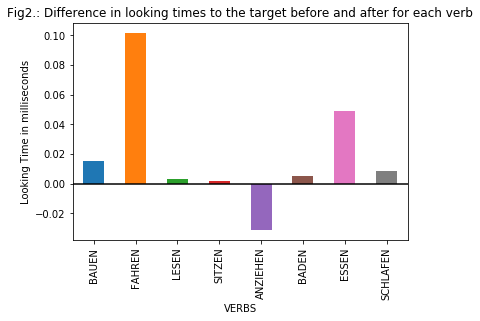

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
################################################################################
# Copyright© 2018. SVAKSHA { https://github.com/svaksha }
# License: AGPLv3+ <http://www.gnu.org/licenses/agpl.html>
# Include the Copyright notice and this permission notice in all copies.
################################################################################
#
# USAGE: check if XLS files exist on your machine, then run each jupyter cell sequentially.
#-------------------------------------------------------------------------------
import numpy as np   # numpy for matrix ops
import pandas as pd     # pandas for XLS reading.
import matplotlib.pyplot as mpl
#-------------------------------------------------------------
pathy = '../data_output/results_simple_difference_score.xlsx'
# creating pandas.io.excel.ExcelFile object in a DF
xls = pd.ExcelFile(pathy)
## it has sheet_names attribute
wb = xls.sheet_names
## now we loop through all the workbook sheets
for sh in wb: #xls.sheet_names:
    matrix = xls.parse(sh)      
# more elegant to generate a dictionary of DataFrame matrices that can be parsed separately.
matr = {sh:xls.parse(sh) for sh in xls.sheet_names} 
sheetnames = matr.keys() # gets sheet names
# Load the matrix for the sheet-2 'Results_Items'
matrx1 = matr['Results_Items']
matr2col = matrx1.iloc[0:49]    # slice thought the matrix for each verb 
#-----------------------------
# Plotting the difference in looking times to target before and after for each verb, averaged (mean) over all VPs.
#-----------------------------
avgmean_verb_bauen2lesen = (matr2col.iloc[0:48, 0:3]).mean()#.plot.bar()
avgmean_verb_sitzen2schlafen = (matr2col.iloc[0:48, 4:9]).mean()#.plot.bar()
matrxJoin = [avgmean_verb_bauen2lesen, avgmean_verb_sitzen2schlafen]

#---------------------
# visualisation
#---------------------
graf_matrx = pd.concat(matrxJoin).plot(kind='bar', stacked=False, legend=False)
mpl.axhline(0, color='black')
mpl.title('Fig2.: Difference in looking times to the target before and after for each verb')
mpl.xlabel('VERBS') 
mpl.ylabel('Looking Time in milliseconds') 
label = graf_matrx.get_legend_handles_labels()
mpl.rcParams.update({'font.size': 12})
mpl.savefig('Fig2_diffLT8vrb.png', bbox_inches='tight')
mpl.show()
mpl.close()

# Fig3_LTavgVrb.png 
## One diagram plotting the looking times to the target before and after _averaged_ over all verbs (two bars).

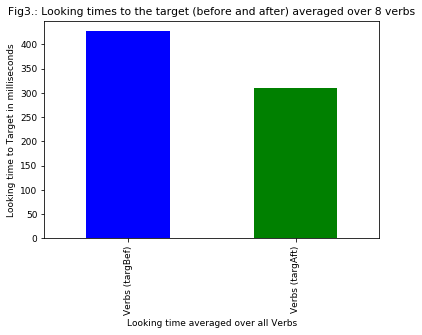

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
################################################################################
# Copyright© 2018. SVAKSHA { https://github.com/svaksha }
# License: AGPLv3+ <http://www.gnu.org/licenses/agpl.html>
# Include the Copyright notice and this permission notice in all copies.
################################################################################
#
# USAGE: check if XLS files exist on your machine, then run each jupyter cell sequentially.
#-------------------------------------------------------------------------------
import numpy as np   # numpy for matrix ops
import pandas as pd     # pandas for XLS reading.
import matplotlib.pyplot as mpl
#-------------------------------------------------------------
pathy = '../data_output/results_simple_target_distractor.xlsx'
# creating pandas.io.excel.ExcelFile object in a DF
xls = pd.ExcelFile(pathy)
wb = xls.sheet_names     ## sheet_names attribute
## loop through all the workbook sheets
for sh in wb: #xls.sheet_names:
    matrix = xls.parse(sh) 
# more elegant to generate a dictionary of DataFrame matrices that can be parsed separately.
matr = {sh:xls.parse(sh) for sh in xls.sheet_names} 
sheetnames = matr.keys() # gets sheet names
# Load the matrix for the sheet-2 'Results_perc'
matrx1 = matr['Results_perc']
#----------------------------------------------------------------------
# calculate mean only from the 52nd to the 63rd rows in columns 2 and 4 (zero based indexing).
# NOTABENE: 
# 1. The dtype changes in the excel file (results_simple_target_distractor.xlsx) in the middle of a columnar operation.
# 2. Hence, indexing for data in the 'TAR BEF MS' and 'TAG AFT MS' columns is via 'BAUEN MS BEF' and 'BAUEN PERC BEF'.
# 3. Also ignore the two verbs "SCHAUKELN" and "TRINKEN".
#----------------------------------------------------------------------
# index only rows for specific 8 verbs, ignore schaukeln and trinken.
verbs8 = matrx1[['BAUEN MS BEF', 'BAUEN PERC BEF']].iloc[[51,52,53,55,56,57,58,59]]  #'TAR BEF MS', 'TAG AFT MS'

# rename columns by altering axes labels.
renameCol = verbs8.rename(index=str, columns={"BAUEN MS BEF": "Verbs (targBef)", "BAUEN PERC BEF": "Verbs (targAft)"})
# Plotting the looking times to the target before and after _averaged_ over 
# all verbs (two bars) for TAR BEF MS and TAG AFT MS
colors = ['b', 'g']
mean8verbs = renameCol.mean().plot(kind='bar', stacked=False, color=colors, legend=False)
mpl.title('Fig3.: Looking times to the target (before and after) averaged over 8 verbs')
mpl.xlabel('Looking time averaged over all Verbs') 
mpl.ylabel('Looking time to Target in milliseconds') # Looking time to Target in milliseconds"
label = graf_matrx.get_legend_handles_labels()
mpl.rcParams.update({'font.size': 9})
mpl.savefig('Fig3_LTavgVrb.png', bbox_inches='tight')
mpl.show()
mpl.close()

# Fig4_DiffLTperVP.png
## One diagram plotting the difference in looking times before and after per individual 

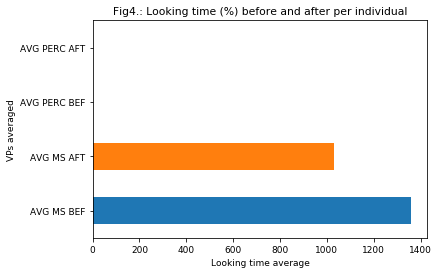

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
################################################################################
# Copyright© 2018. SVAKSHA { https://github.com/svaksha }
# License: AGPLv3+ <http://www.gnu.org/licenses/agpl.html>
# Include the Copyright notice and this permission notice in all copies.
################################################################################
#
# USAGE: check if XLS files exist on your machine, then run each jupyter cell sequentially.
#-------------------------------------------------------------------------------
import numpy as np   # numpy for matrix ops
import pandas as pd     # pandas for XLS reading.
import matplotlib.pyplot as mpl
from matplotlib.backends.backend_pdf import PdfPages
#-------------------------------------------------------------
pathy = '../data_output/results_simple_target_distractor.xlsx'
# creating pandas.io.excel.ExcelFile object in a DF
xls = pd.ExcelFile(pathy)
wb = xls.sheet_names  ##sheet_names attribute
## loop through all the workbook sheets
for sh in wb: #xls.sheet_names:
    matrix = xls.parse(sh)    
# more elegant to generate a dictionary of DataFrame matrices that can be parsed separately.
matr = {sh:xls.parse(sh) for sh in xls.sheet_names} 
sheetnames = matr.keys() # gets sheet names
# Load the sheet-2 'Results_perc' as a matrix.
matrx1 = matr['Results_perc']
#-------
# Barplot horizontal : difference in looking times before and after per individual 
#------
diff_meanBar = (matrx1.iloc[0:20, 40:44]).mean().plot.barh()
mpl.title('Fig4.: Looking time (%) before and after per individual')
mpl.xlabel('Looking time average') 
mpl.ylabel('VPs averaged')
mpl.rcParams.update({'font.size': 12})
mpl.savefig('Fig4_DiffLTperVP.png', bbox_inches='tight')
mpl.show()
mpl.close()